In [1]:
library(Seurat)
library(ggplot2)
library(RColorBrewer)
library(harmony)
library(clusterProfiler)
library(enrichplot)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: Rcpp



clusterProfiler v4.0.5  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141. doi: 10.1016/j.xinn.2021.100141


Attaching package: ‘clusterProfiler’


The following object is masked from ‘package:stats’:

    filter




In [2]:
mye = readRDS('./results/Step2_subCluster/Myeloid cells/allGenes_scaleHarmony_SCT_2022JIC_2020NC_Dataset_20220720.rds')

In [3]:
meta = read.csv('./results/Step2_subCluster/Myeloid cells/meta.csv',row.names = 1)

In [4]:
mye$cluster_name = meta[colnames(mye),]$cluster_name

In [5]:
unique(mye$cluster_name)

[1] "Macro_FABP4" "Neutrophil"  "Macro"       "Prolif"      "Macro_FLOR2"
[6] "cDCs"        "Mono"        "mDC"         "pDC"

In [6]:
markers = FindMarkers(mye,
                      ident.1 = colnames(mye)[which(mye$cluster_name == 'Macro_FLOR2' & mye$mutation == 'Del19')],
                      ident.2 = colnames(mye)[which(mye$cluster_name == 'Macro_FLOR2' & mye$mutation == 'L858R')],
                      assay='SCT',
                      min.pct=0,
                      logfc.threshold = 0
                     )

In [7]:
macro_gmt = read.gmt('/share/pub/zhangyr/projects/cooperation/SJTU/ESCC/data/geneSets/macro/all.gmt')

In [8]:
markers = markers[order(markers$avg_log2FC,decreasing = T),]

In [9]:
genes = markers$avg_log2FC
names(genes) = rownames(markers)

In [14]:
res_gsea = GSEA(genes,TERM2GENE = macro_gmt,pvalueCutoff = 1)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (57.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [19]:
aa = data.frame(res_gsea)
aa  = aa[which(aa$pvalue<0.05),]

In [20]:
rownames(aa)[1,2,4]

[1] "HALLMARK_TNFA_SIGNALING_VIA_NFKB"  "HALLMARK_COMPLEMENT"              
[3] "KEGG_PROTEASOME"                   "GOBP_RESPONSE_TO_INTERFERON_GAMMA"

In [24]:
pdf('./results/figures/0720/MACRO/gseaplot_macroFLOR2_del19_vs_l858r.pdf',width=4,height=3.2)
gseaplot2(res_gsea,rownames(aa)[c(1,2,4)],subplots=1:2,ES_geom = 'dot',rel_heights = c(1.2,0.2))
dev.off()

png 
  2

In [36]:
m12_gmt = read.csv('/share/pub/zhangyr/projects/cooperation/SJTU/ESCC/data/geneSets/Ma_M1M2.txt',sep='\t')
m12_gmt = m12_gmt[,c('Groups','Genes')]
colnames(m12_gmt) = c('term','gene')
m12_gsea = GSEA(genes,pvalueCutoff = 1,TERM2GENE = m12_gmt)

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (57.46% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
leading edge analysis...

done...



In [37]:
data.frame(m12_gsea)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalues,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
M2,M2,M2,83,-0.7055705,-1.767418,0.0005436839,0.001087368,0.0005722989,1010,"tags=40%, list=4%, signal=38%",PDCD1LG2/CCL23/P2RY14/MS4A4A/MS4A6A/IL4R/EGR2/IRF4/CD36/CTSB/CSF1R/HS3ST2/CTSA/MMP9/PPARG/CD276/VEGFB/LTA4H/CTSC/CCL20/CCL22/CCL2/CCL13/MMP14/MRC1/CCL17/MMP19/MARCO/CCL18/CTSD/CXCR4/IL1RN/VEGFA
M1,M1,M1,70,-0.5238277,-1.291452,0.0985915493,0.098591549,0.0518902891,1608,"tags=39%, list=6%, signal=36%",APOL3/APOL2/IRF5/BCL2A1/IRF1/APOL1/PTX3/FAS/IL23A/CCL19/IL1A/IL7R/OAS2/INHBA/GADD45G/CCL20/CCL22/BIRC3/CCR7/TNFRSF1B/IL1B/SIGLEC1/HLA-DPB1/CCL17/SLC7A5/MT-CO2/MARCO


In [2]:
mye = readRDS('./results//Step2_subCluster/Myeloid cells/mye_scANVI.rds')

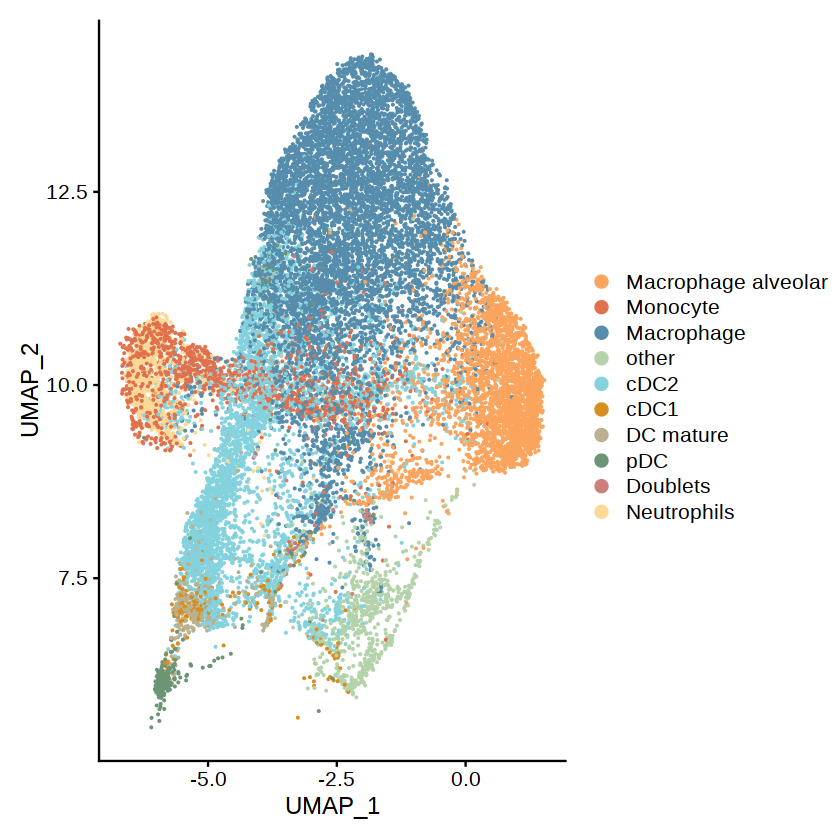

In [3]:
DimPlot(mye, cols = c("#FAA45D","#E1714C","#568DAC","#B4D3AA","#84D2DE",
                      "#D78E1E","#BAB190","#6C9575","#CD7F7D","#FCD997"
                     ))

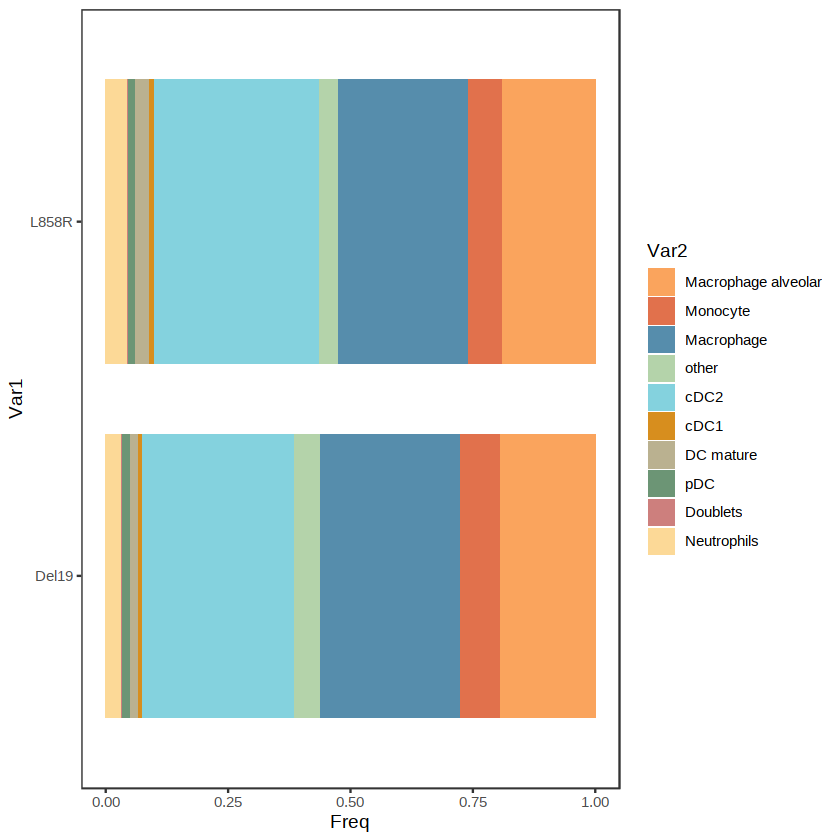

In [20]:
plot_data2 = plot_data2[which(plot_data2$Var1 != 'WT'),]
ggplot(plot_data2,aes( x = Var1,y=Freq,fill = Var2))+
       geom_bar(stat='identity',position="fill", width=0.8)+
       theme_bw()+coord_flip()+ theme(panel.grid=element_blank())+
       scale_fill_manual(values = 
                         c("#FAA45D","#E1714C","#568DAC","#B4D3AA","#84D2DE",
                           "#D78E1E","#BAB190","#6C9575","#CD7F7D","#FCD997"
                     ))

In [38]:
cc = mye$scANVI
#print(table(cc))
cc[which(Idents(mye) %in% c('Macrophage','cDC2'))] = 'target'
cc[which(cc != 'target')] = 'other'

In [39]:
table(cc)

cc
 other target 
  6718  11922 

In [42]:
11922 + 6718

[1] 18640

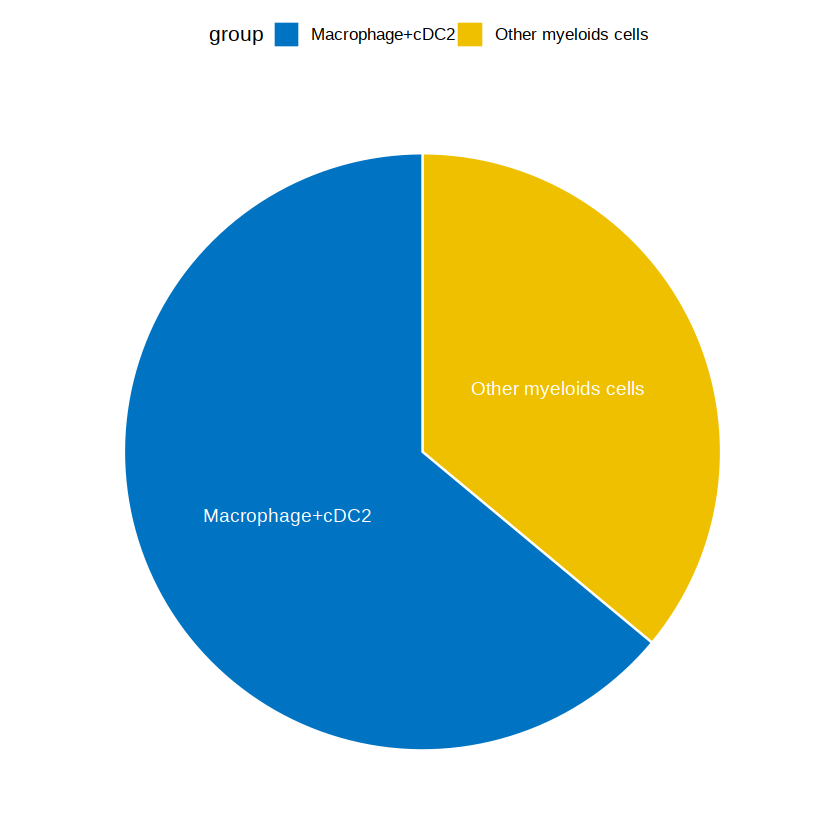

In [40]:
plot1 = data.frame(prop = c(sum(cc == 'target'),
                            sum(cc == 'other')),
                   group = c('Macrophage+cDC2','Other myeloids cells')
                  )
library(ggpubr)
p1 = ggpie(plot1, 'prop',  #绘图，只用写频数就行，切记不用再写分组
      fill = 'group', palette = 'jco', #按照Cylinders填充，颜色板为jco.
      label = plot1$group, lab.pos = 'in', lab.font = c(4, 'white'),
      color = "white"
     ) #设置标签，标签的位置在图的内部，标签的大小为4， 颜色为白色.
p1

In [43]:
prop.test(11922, 18640)


	1-sample proportions test with continuity correction

data:  11922 out of 18640, null probability 0.5
X-squared = 1452.3, df = 1, p-value < 2.2e-16
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.6326448 0.6464820
sample estimates:
        p 
0.6395923 


In [45]:
library(testSctpa)
gsets = getGMT('./data//gSets//macro.gmt')

In [49]:
macro = mye[,which(mye$scANVI == 'Macrophage')]

In [50]:
macro_score = calVision(macro@assays$RNA@data, gsets)

In [51]:
macro_score = as.data.frame(t(macro_score))
macro_score$mutation = macro$mutation

In [52]:
head(macro_score)

,M1,M2,mutation
,<dbl>,<dbl>,<chr>
1,1.929728,0.6379890,L858R
2,1.662691,0.7677160,L858R
3,1.207385,1.1170010,L858R
4,1.597734,0.9945915,L858R
5,1.508292,0.9418470,L858R
6,1.563306,0.8072126,L858R


`geom_smooth()` using formula 'y ~ x'



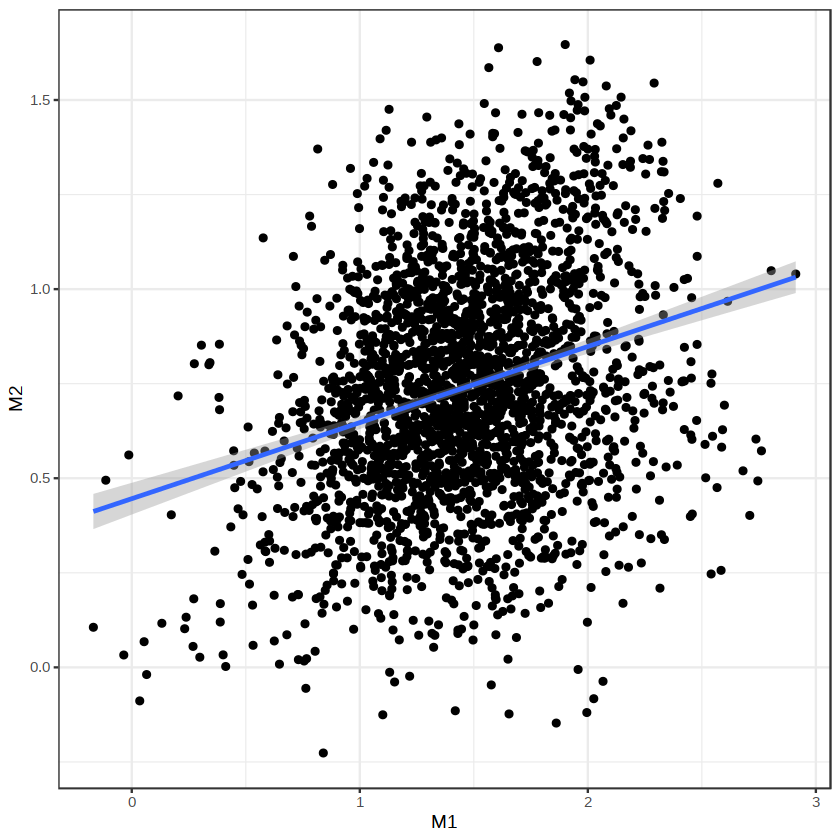

In [58]:
ggplot(macro_score[which(macro_score$mutation !='WT'),],aes( x = M1,y=M2))+
       geom_point()+
       theme_bw()+geom_smooth(method = lm)

In [63]:
pdf('./results//figures/published/Figure5/point_macrophage_M1_M2.pdf',width = 3,height = 3)
ggplot(macro_score[which(macro_score$mutation !='WT'),],aes( x = M1,y=M2))+
       geom_point()+
       theme_bw()+geom_smooth(method = lm)
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

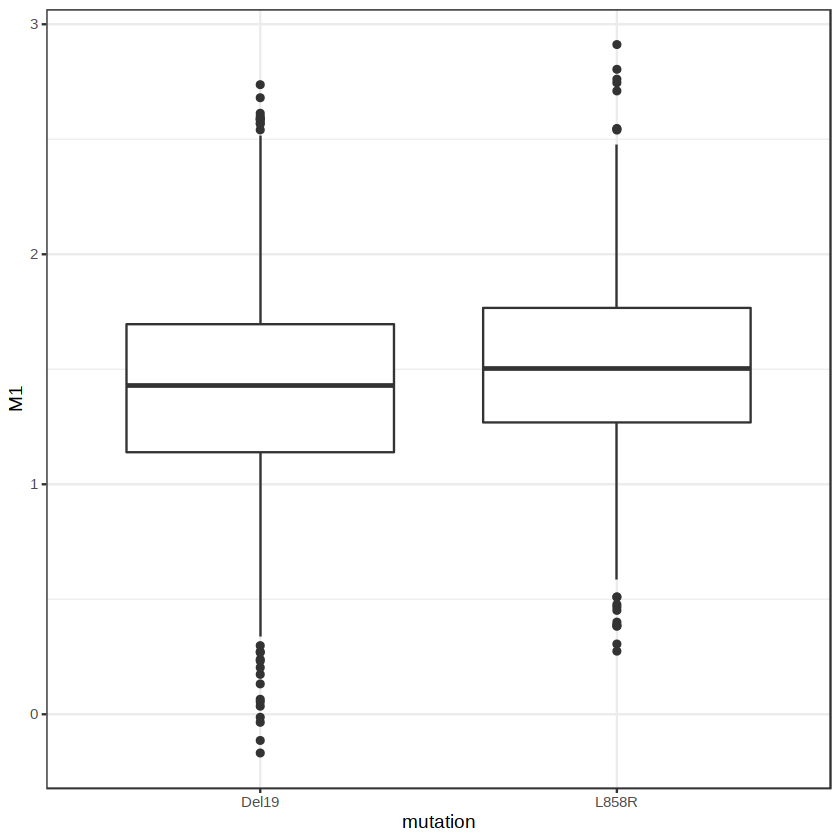

In [59]:
ggplot(macro_score[which(macro_score$mutation !='WT'),], aes(x = mutation, y = M1))+
       geom_boxplot()+
       theme_bw()

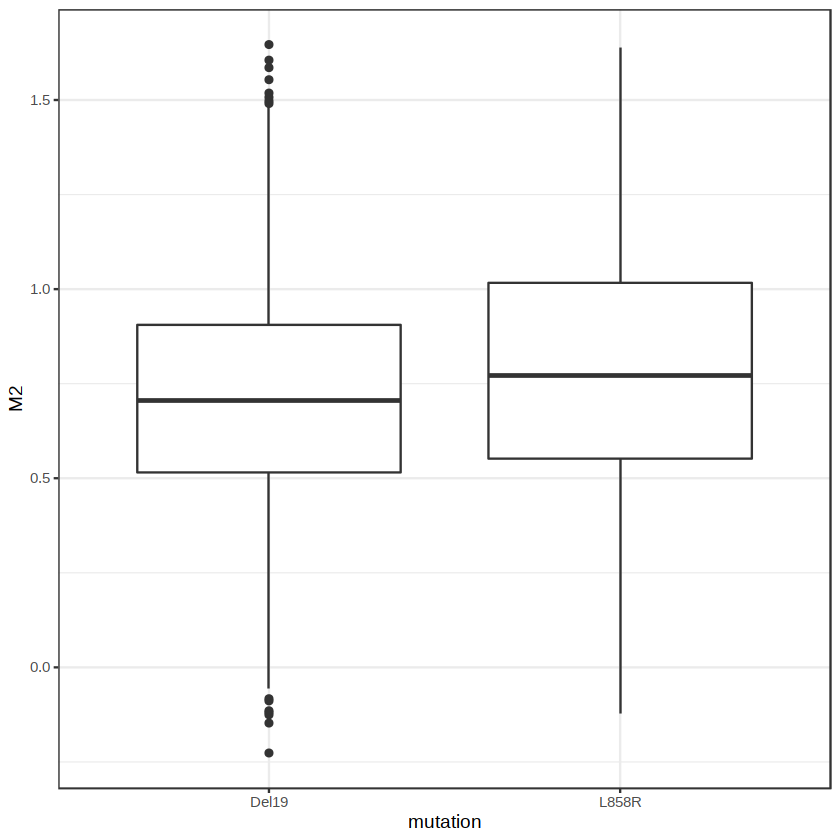

In [60]:
ggplot(macro_score[which(macro_score$mutation !='WT'),], aes(x = mutation, y = M2))+
       geom_boxplot()+
       theme_bw()

In [66]:
macro_markers = read.csv('./results//Step2_subCluster//Myeloid cells//diffGenes_macrophage_del19VsL858R.csv',row.names = 1)
head(macro_markers)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CCL18,5.107164e-66,-1.4963684,0.231,0.569,6.944722e-62
PSAP,2.406730e-65,-0.7439116,0.979,0.991,3.272672e-61
CTSS,7.543299e-60,-0.7490204,0.912,0.969,1.025738e-55
SCGB3A2,2.684777e-59,-1.0457750,0.169,0.469,3.650760e-55
FTL,1.121239e-56,-0.9140049,1.000,1.000,1.524660e-52
ACP5,2.917696e-54,-0.9198919,0.591,0.801,3.967483e-50


In [4]:
DefaultAssay(mye) = 'RNA'

In [95]:
macro_markers = FindMarkers(mye[,which(mye$scANVI == 'Macrophage')],
                              ident.1 = colnames(mye)[which(mye$scANVI == 'Macrophage' & mye$mutation == 'Del19')],
                              ident.2 = colnames(mye)[which(mye$scANVI == 'Macrophage' & mye$mutation == 'L858R')],
                            test.use = 'MAST'
                              #min.pct = 0,
                              #logfc.threshold = 0
                              )


 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------


 Completed [===============================>------------]  74% with 0 failures

 Completed [================================>-----------]  74% with 0 failures

 Completed [================================>-----------]  75% with 0 failures

 Completed [================================>-----------]  76% with 0 failures

 Completed [=================================>----------]  76% with 0 failures

 Completed [=================================>----------]  77% with 0 failures

 Completed [=================================>----------]  78% with 0 failures

 Completed [==================================>---------]  78% with 0 failures

 Completed [==================================>---------]  79% with 0 failures

 Completed [==================================>---------]  80% with 0 failures

 Completed [==================================>---------]  81% with 0 failures

 Completed [===================================>--------]  81% with 0 failures

 Completed [===========================


 Completed [==================>-------------------------]  44% with 0 failures

 Completed [===================>------------------------]  44% with 0 failures

 Completed [===================>------------------------]  45% with 0 failures

 Completed [===================>------------------------]  46% with 0 failures

 Completed [===================>------------------------]  47% with 0 failures

 Completed [====================>-----------------------]  47% with 0 failures

 Completed [====================>-----------------------]  48% with 0 failures

 Completed [====================>-----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  50% with 0 failures

 Completed [=====================>----------------------]  51% with 0 failures

 Completed [======================>---------------------]  51% with 0 failures

 Completed [======================>----

In [96]:
up_go = enrichGO(gene=rownames(macro_markers)[which(macro_markers$avg_log2FC>1 & macro_markers$p_val_adj<0.05)], 
                 ont ="BP", 
                 keyType = "SYMBOL", 
                 minGSSize = 3, 
                 maxGSSize = 800, 
                 qvalueCutoff = 0.05, 
                 OrgDb = "org.Hs.eg.db")
up_go = as.data.frame(up_go)

down_go = enrichGO(gene=rownames(macro_markers)[which(macro_markers$avg_log2FC<1 & macro_markers$p_val_adj<0.05)], 
                   ont ="BP", 
                   keyType = "SYMBOL", 
                   minGSSize = 3, 
                   maxGSSize = 800, 
                   qvalueCutoff = 0.05, 
                   OrgDb = "org.Hs.eg.db")
down_go = as.data.frame(down_go)

plot_data = rbind(up_go,down_go)
plot_data$log10P = -log10(plot_data$p.adjust)

In [101]:
plot_data = rbind(up_go[1:30,],down_go[1:30,])
plot_data$log10P = -log10(plot_data$p.adjust)
plot_data$group = c(rep('Del19',30),rep('L858R',30))
plot_data$log10P[which(plot_data$group == 'Del19')] = -plot_data$log10P[which(plot_data$group == 'Del19')]

In [100]:
dim(down_go)
dim(up_go)

[1] 590   9

[1] 143   9

In [99]:
head(down_go, 30)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0000184,GO:0000184,"nuclear-transcribed mRNA catabolic process, nonsense-mediated decay",46/661,120/18862,7.922749e-36,2.304332e-32,1.898124e-32,RPS17/PABPC1/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/MAGOH/RPL7/RPS20/RPS23/RPL32/RPL13A/RPL36A/RPS12/RPS18/RPL7A/RPL12/PNRC2/RPS11/EIF3E/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,46
GO:0045047,GO:0045047,protein targeting to ER,46/661,120/18862,7.922749e-36,2.304332e-32,1.898124e-32,RPS17/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/SEC61G/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/SPCS2/RPS23/RPL32/RPL13A/SRP14/RPL36A/RPS12/RPS18/RPL7A/RPL12/SPCS1/RPS11/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,46
GO:0072599,GO:0072599,establishment of protein localization to endoplasmic reticulum,46/661,124/18862,4.573521e-35,7.431890e-32,6.121796e-32,RPS17/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/SEC61G/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/SPCS2/RPS23/RPL32/RPL13A/SRP14/RPL36A/RPS12/RPS18/RPL7A/RPL12/SPCS1/RPS11/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,46
GO:0006614,GO:0006614,SRP-dependent cotranslational protein targeting to membrane,43/661,105/18862,5.110462e-35,7.431890e-32,6.121796e-32,RPS17/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/RPS23/RPL32/RPL13A/SRP14/RPL36A/RPS12/RPS18/RPL7A/RPL12/RPS11/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,43
GO:0006413,GO:0006413,translational initiation,55/661,193/18862,8.781704e-35,1.021663e-31,8.415646e-32,RPS17/PABPC1/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/EIF4EBP1/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/EIF3A/EIF3G/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/RPS23/RPL32/RPL13A/RPL36A/RPS12/RPS18/PAIP2/RPL7A/RPL12/EIF4E/RPS11/EIF3E/TMED2/EIF4A2/PPP1CA/RPS10/RPL35A/RPL11/RPS13/EIF4H/EIF4E2/EIF2AK2/UBA52/RPS28/RPL27,55
GO:0006613,GO:0006613,cotranslational protein targeting to membrane,43/661,110/18862,5.499867e-34,5.332121e-31,4.392174e-31,RPS17/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/RPS23/RPL32/RPL13A/SRP14/RPL36A/RPS12/RPS18/RPL7A/RPL12/RPS11/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,43
GO:0070972,GO:0070972,protein localization to endoplasmic reticulum,48/661,152/18862,8.931505e-33,7.422081e-30,6.113716e-30,RPS17/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/SEC61G/RPL10/RPL38/RPSA/RPS7/RPL34/RPL36/RPL24/RPL10A/RPL3/RPL29/RPL28/RPL37/RPL37A/RPL35/RPL7/RPS20/SPCS2/RPS23/RPL32/RPL13A/SRP14/RPL36A/RPS12/RPS18/RPL7A/RPL12/SPCS1/RPS11/KDELR2/RER1/RPS10/RPL35A/RPL11/RPS13/UBA52/RPS28/RPL27,48
GO:1901361,GO:1901361,organic cyclic compound catabolic process,90/661,637/18862,2.117622e-30,1.539776e-27,1.268344e-27,SPP1/SLC11A1/RNASET2/RPS17/PABPC1/YWHAH/ZFP36L1/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/PSME2/HINT1/RPL10/RPL38/RPSA/LSM3/RPS7/TYMP/RPL34/RPL36/RPL24/UBC/CYP27A1/RPL10A/RPL3/VIM/RPL29/HMOX1/RPL28/RPL37/RPL37A/RPL35/PSMD8/MAGOH/ACOT7/RPL7/RPS20/RPS23/PSMB9/RPL32/RPL13A/HSD17B11/RPL36A/PSMB1/RPS12/RPS18/SLIRP/RPL7A/UPP1/RPL12/RNASE6/NUP214/HMGB2/OAS2/PNRC2/PSMB8/LSM5/RPS11/EIF3E/PSMA7/HMGB1/NUDT1/PSMC5/NFE2L2/ATM/APOE/PSMB3/DNASE2B/SCARB1/RPS10/RPL35A/RPL11/RPS13/PSMD13/SAMHD1/ZC3HAV1/BLVRA/WDR61/UBA52/RPS28/PSMD4/NT5C3A/RPL27/ELAVL1,90
GO:0006401,GO:0006401,RNA catabolic process,71/661,414/18862,2.610832e-29,1.687467e-26,1.390001e-26,SLC11A1/RNASET2/RPS17/PABPC1/ZFP36L1/RPL23A/RPL26/RPS25/RPS24/RPS15A/RPL41/RPL9/RPL39/RPL18A/PSME2/RPL10/RPL38/RPSA/LSM3/RPS7/RPL34/RPL36/RPL24/UBC/RPL10A/RPL3/VIM/RPL29/RPL28/RPL37/RPL37A/RPL35/PSMD8/

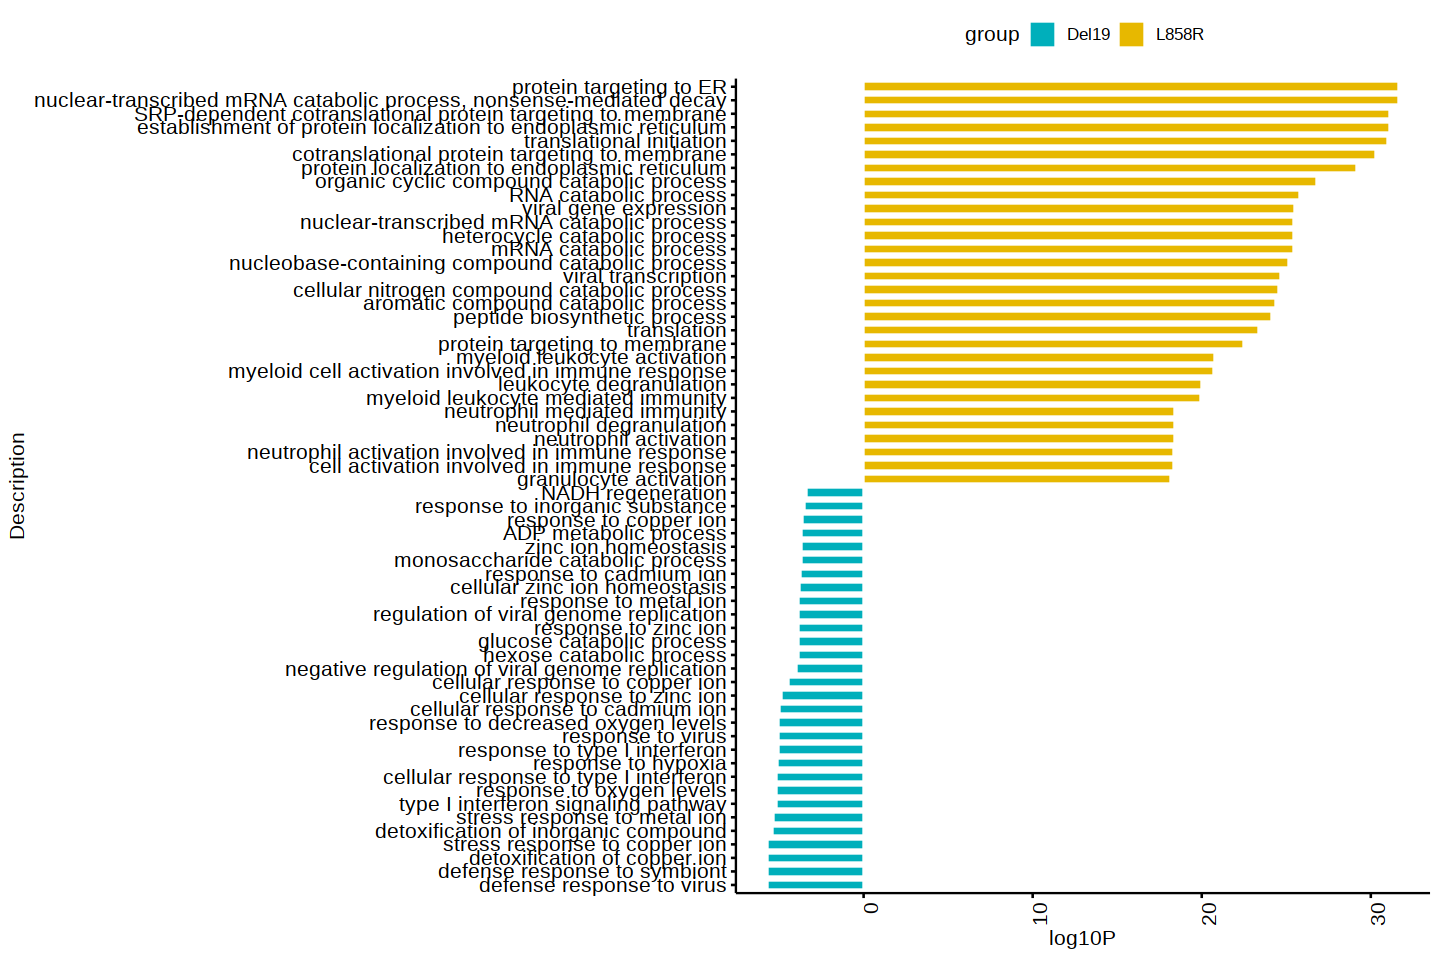

In [102]:
ggbarplot(plot_data, x = "Description", y = "log10P",
          fill = "group",               # change fill color by cyl
          color = "white",            # Set bar border colors to white
          palette = c("#00AFBB", "#E7B800", "#FC4E07"),            # jco journal color palett. see ?ggpar
          sort.val = "asc",           # Sort the value in dscending order
          #sort.by.groups = TRUE,      # Sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          rotate = TRUE)

In [104]:
pdf('./results//figures//published//Figure5/bar_goEnrich_macrophage_19delVsL858R.pdf',width = 10,height = 9)
ggbarplot(plot_data, x = "Description", y = "log10P",
          fill = "group",               # change fill color by cyl
          color = "white",            # Set bar border colors to white
          palette = c("#00AFBB", "#E7B800", "#FC4E07"),            # jco journal color palett. see ?ggpar
          sort.val = "asc",           # Sort the value in dscending order
          #sort.by.groups = TRUE,      # Sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          rotate = TRUE)
dev.off()

png 
  2

In [7]:
cdc2_markers = FindMarkers(mye[,which(mye$scANVI == 'cDC2')],
                              ident.1 = colnames(mye)[which(mye$scANVI == 'cDC2' & mye$mutation == 'Del19')],
                              ident.2 = colnames(mye)[which(mye$scANVI == 'cDC2' & mye$mutation == 'L858R')],
                            test.use = 'MAST',
                              min.pct = 0,
                              logfc.threshold = 0
                              )


 Completed [--------------------------------------------]   0% with 0 failures

 Completed [--------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   1% with 0 failures

 Completed [>-------------------------------------------]   2% with 0 failures

 Completed [>-------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   3% with 0 failures

 Completed [=>------------------------------------------]   4% with 0 failures

 Completed [=>------------------------------------------]   5% with 0 failures

 Completed [=>------------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   6% with 0 failures

 Completed [==>-----------------------------------------]   7% with 0 failures

 Completed [==>-----------------------------------------]   8% with 0 failures

 Completed [===>-----------------------


 Completed [===============================>------------]  74% with 0 failures

 Completed [================================>-----------]  74% with 0 failures

 Completed [================================>-----------]  75% with 0 failures

 Completed [================================>-----------]  76% with 0 failures

 Completed [=================================>----------]  76% with 0 failures

 Completed [=================================>----------]  77% with 0 failures

 Completed [=================================>----------]  78% with 0 failures

 Completed [==================================>---------]  78% with 0 failures

 Completed [==================================>---------]  79% with 0 failures

 Completed [==================================>---------]  80% with 0 failures

 Completed [==================================>---------]  81% with 0 failures

 Completed [===================================>--------]  81% with 0 failures

 Completed [===========================


 Completed [==================>-------------------------]  44% with 0 failures

 Completed [===================>------------------------]  44% with 0 failures

 Completed [===================>------------------------]  45% with 0 failures

 Completed [===================>------------------------]  46% with 0 failures

 Completed [===================>------------------------]  47% with 0 failures

 Completed [====================>-----------------------]  47% with 0 failures

 Completed [====================>-----------------------]  48% with 0 failures

 Completed [====================>-----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  49% with 0 failures

 Completed [=====================>----------------------]  50% with 0 failures

 Completed [=====================>----------------------]  51% with 0 failures

 Completed [======================>---------------------]  51% with 0 failures

 Completed [======================>----

Warning message:
“ggrepel: 15 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


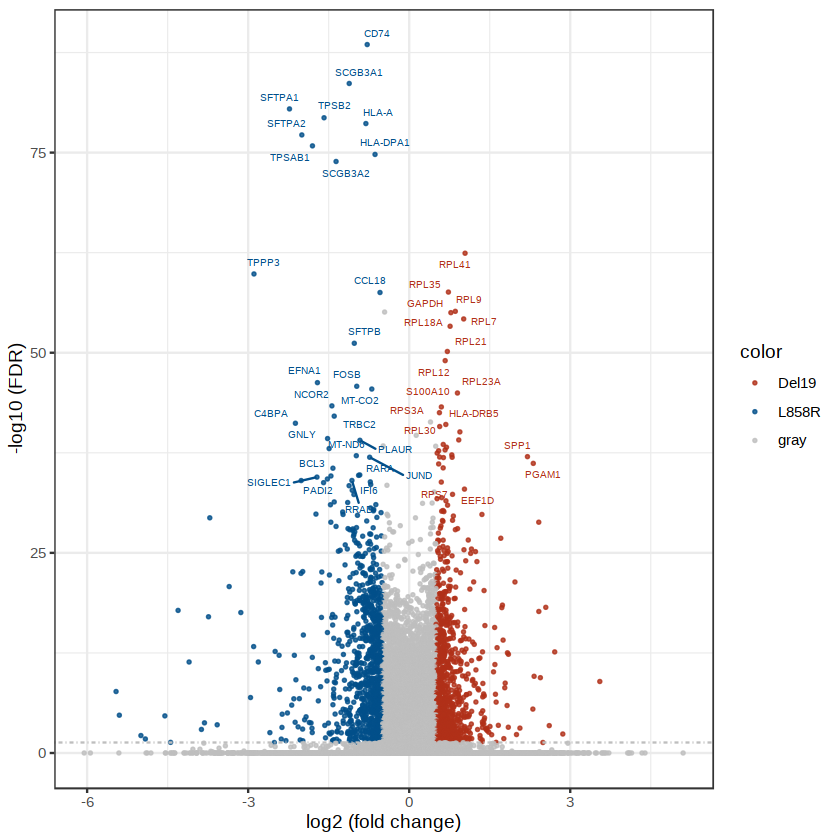

In [19]:
library(dplyr)
library(ggrepel)
cdc2_markers$gene = rownames(cdc2_markers)
cdc2_markers$color = ifelse(cdc2_markers$p_val_adj<0.05 & abs(cdc2_markers$avg_log2FC)>=0.5, 
                           ifelse(cdc2_markers$avg_log2FC>0.5, 'Del19','L858R'),'gray')
color = c('Del19'='#B03018','L858R'='#024F8A',gray='gray')

shown_data = cdc2_markers[which(cdc2_markers$color != 'gray'),] %>%
  group_by(color) %>%
  top_n(n = 30, wt = -p_val_adj)

ggplot(cdc2_markers, aes(avg_log2FC, -log10(p_val_adj), col=color))+
   geom_point(size=0.5,alpha=0.8)+
   theme_bw()+
   scale_color_manual(values=color)+
   labs(x='log2 (fold change)',y='-log10 (FDR)')+
   geom_hline(yintercept = -log10(0.05), lty=4,col='gray',lwd=0.5)+
   geom_text_repel(data = shown_data,aes(x = avg_log2FC, y=-log10(p_val_adj),label=gene),size=2,
                   show.legend=F)

In [20]:
pdf('./results/figures/published/Figure5/volcano_diffGene_cDC2_19delVsL858R.pdf',width = 4.8,height = 4)
ggplot(cdc2_markers, aes(avg_log2FC, -log10(p_val_adj), col=color))+
   geom_point(size=0.5,alpha=0.8)+
   theme_bw()+
   scale_color_manual(values=color)+
   labs(x='log2 (fold change)',y='-log10 (FDR)')+
   geom_hline(yintercept = -log10(0.05), lty=4,col='gray',lwd=0.5)+
   geom_text_repel(data = shown_data,aes(x = avg_log2FC, y=-log10(p_val_adj),label=gene),size=2,
                   show.legend=F)
dev.off()

Warning message:
“ggrepel: 35 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


png 
  2

In [21]:
up_go = enrichGO(gene=rownames(cdc2_markers)[which(cdc2_markers$avg_log2FC>1 & cdc2_markers$p_val_adj<0.05)], 
                 ont ="BP", 
                 keyType = "SYMBOL", 
                 minGSSize = 3, 
                 maxGSSize = 800, 
                 qvalueCutoff = 0.05, 
                 OrgDb = "org.Hs.eg.db")
up_go = as.data.frame(up_go)

down_go = enrichGO(gene=rownames(cdc2_markers)[which(cdc2_markers$avg_log2FC<1 & cdc2_markers$p_val_adj<0.05)], 
                   ont ="BP", 
                   keyType = "SYMBOL", 
                   minGSSize = 3, 
                   maxGSSize = 800, 
                   qvalueCutoff = 0.05, 
                   OrgDb = "org.Hs.eg.db")
down_go = as.data.frame(down_go)

plot_data = rbind(up_go,down_go)
plot_data$log10P = -log10(plot_data$p.adjust)

Loading required package: org.Hs.eg.db

Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order,

In [22]:
n = 20
plot_data = rbind(up_go[1:n,],down_go[1:n,])
plot_data$log10P = -log10(plot_data$p.adjust)
plot_data$group = c(rep('Del19',n),rep('L858R',n))
plot_data$log10P[which(plot_data$group == 'Del19')] = -plot_data$log10P[which(plot_data$group == 'Del19')]

In [116]:
head(plot_data)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,log10P,group
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<chr>
GO:0010273,GO:0010273,detoxification of copper ion,4/115,15/18862,1.699369e-06,0.001716543,0.001454999,MT2A/MT1X/MT1E/MT1G,4,-2.765345,Del19
GO:1990169,GO:1990169,stress response to copper ion,4/115,15/18862,1.699369e-06,0.001716543,0.001454999,MT2A/MT1X/MT1E/MT1G,4,-2.765345,Del19
GO:0061687,GO:0061687,detoxification of inorganic compound,4/115,17/18862,2.935213e-06,0.001716543,0.001454999,MT2A/MT1X/MT1E/MT1G,4,-2.765345,Del19
GO:0071276,GO:0071276,cellular response to cadmium ion,5/115,38/18862,3.299409e-06,0.001716543,0.001454999,MT2A/MT1X/MT1E/MT1G/NCF1,5,-2.765345,Del19
GO:0097501,GO:0097501,stress response to metal ion,4/115,18/18862,3.756111e-06,0.001716543,0.001454999,MT2A/MT1X/MT1E/MT1G,4,-2.765345,Del19
GO:0007005,GO:0007005,mitochondrion organization,14/115,548/18862,6.238641e-06,0.002318148,0.001964939,NDUFV2/PRELID1/NDUFC2/PHB/COX20/MTX1/BNIP3/UQCC2/PET100/GABARAP/BAD/UQCC3/MTERF4/TOMM5,14,-2.634859,Del19


In [121]:
class(plot_data$log10P)

[1] "numeric"

In [137]:
plot_data$log10P = as.factor(plot_data$log10P)

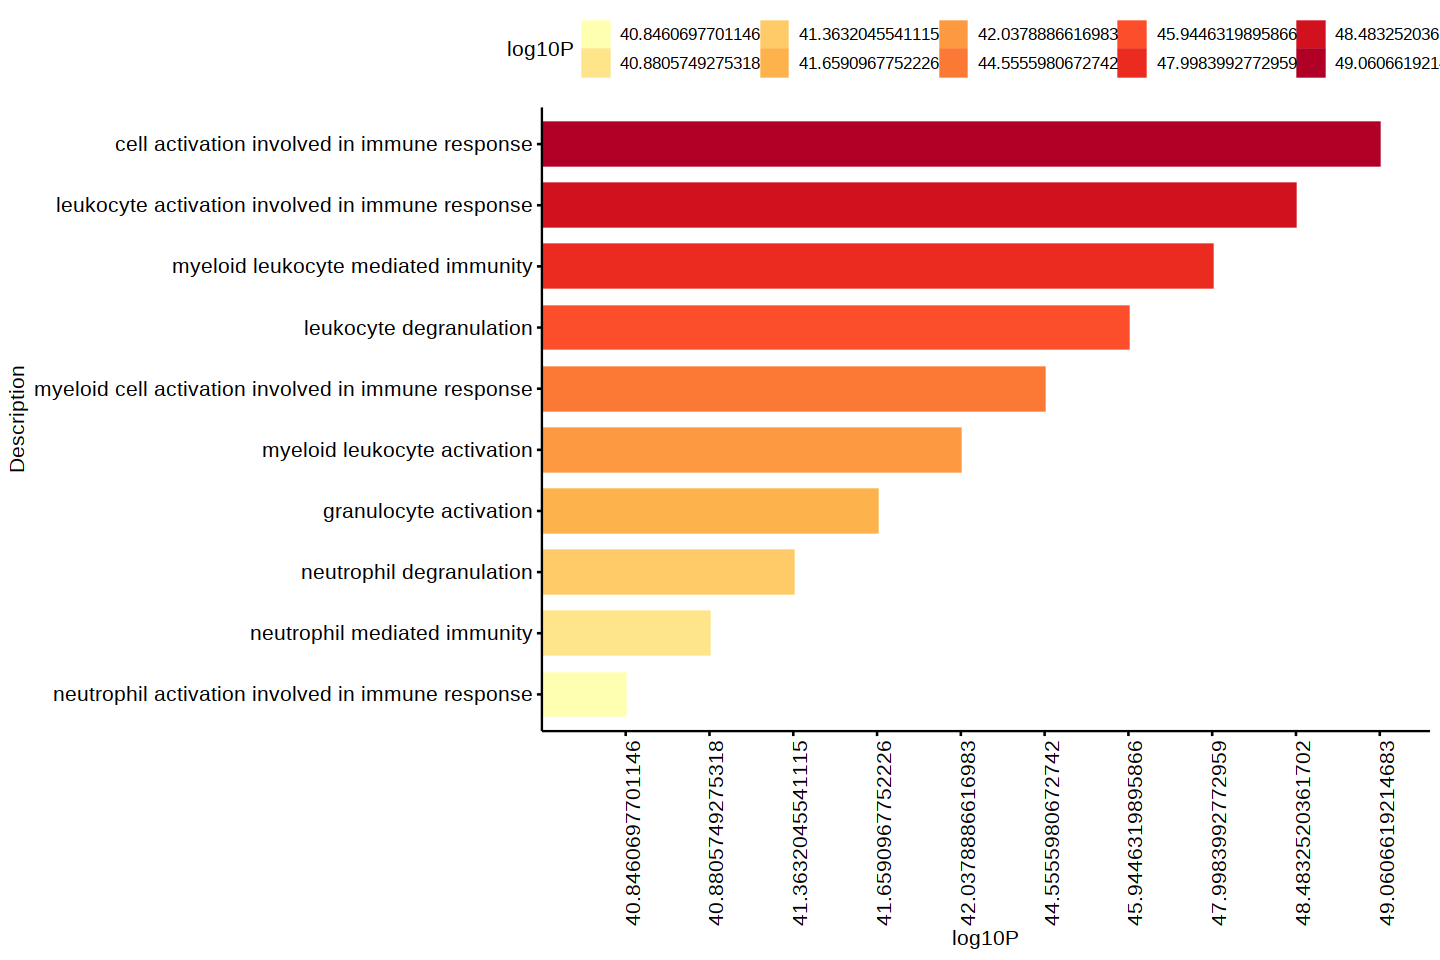

In [142]:
ggbarplot(plot_data[which(plot_data$group == 'L858R'),], 
          x = "Description", y = "log10P",
          fill = "log10P",               # change fill color by cyl
          color = "log10P",            # Set bar border colors to white
          palette = colorRampPalette(brewer.pal(n = 7, name = "YlOrRd"))(10),
          #palette = c("#00AFBB", "#E7B800", "#FC4E07"),            # jco journal color palett. see ?ggpar
          sort.val = "asc",           # Sort the value in dscending order
          #sort.by.groups = TRUE,      # Sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          rotate = TRUE)

In [145]:
plot_data$log10P = as.numeric(plot_data$log10P)

In [71]:
library(liana)

In [72]:
data = readRDS('./results/Step1_allCluster/Filtered_merged_20231108.rds')

In [74]:
sort(unique(data$cellTypes_subsets))

[1] "Bfoc"                "Bmem"                "Bn"                 
 [4] "Bprf"                "CAF_ATCA2"           "CAF_FGF7"           
 [7] "CAF_FGF7_HGF"        "CD4_FOS"             "CD4_GZMB"           
[10] "CD4_Naive-like"      "CD4_Tfh"             "CD4_Treg"           
[13] "CD8_CD4_low"         "CD8_GZMK"            "CD8_LAG3"           
[16] "CD8_Naive-like"      "cDC1"                "cDC2"               
[19] "Epi_AGER"            "Epi_CAPS"            "Epi_DMBT1"          
[22] "Epi_ECM1"            "Epi_KRT17"           "Epi_MGP"            
[25] "Epi_MKI67"           "Epi_MUC13"           "Epi_S100A9"         
[28] "Epi_SCGB3A2"         "Fprf"                "LEC"                
[31] "Macrophage"          "Macrophage alveolar" "Mast cells"         
[34] "mDC"                 "Monocyte"            "Neutrophils"        
[37] "NK"                  "pB"                  "pDC"                
[40] "TEC"                 "Tprf"

In [75]:
test_data = data[,which(data$cellTypes_subsets %in% c('pDC','CD8_GZMK'))]

In [84]:
DefaultAssay(test_data) = 'RNA'

In [85]:
liana_test = liana_wrap(test_data, idents_col = 'cellTypes_subsets')

Expression from the `RNA` assay will be used

Running LIANA with `cluster_name_1107` as labels!

`Idents` were converted to factor

Warning message in exec(output, ...):
“318 genes and/or 0 cells were removed as they had no counts!”
LIANA: LR summary stats calculated!

Now Running: Natmi

Now Running: Connectome

Now Running: Logfc

Now Running: Sca

Now Running: Cellphonedb



In [86]:
liana_test <- liana_test %>%
  liana_aggregate()

Now aggregating natmi

Now aggregating connectome

Now aggregating logfc

Now aggregating sca

Now aggregating cellphonedb

Aggregating Ranks



In [87]:
liana_test_plot = liana_test[order(liana_test$mean_rank,decreasing = F),]
liana_test_plot = liana_test_plot[which(liana_test_plot$cellphonedb.pvalue<0.05),]

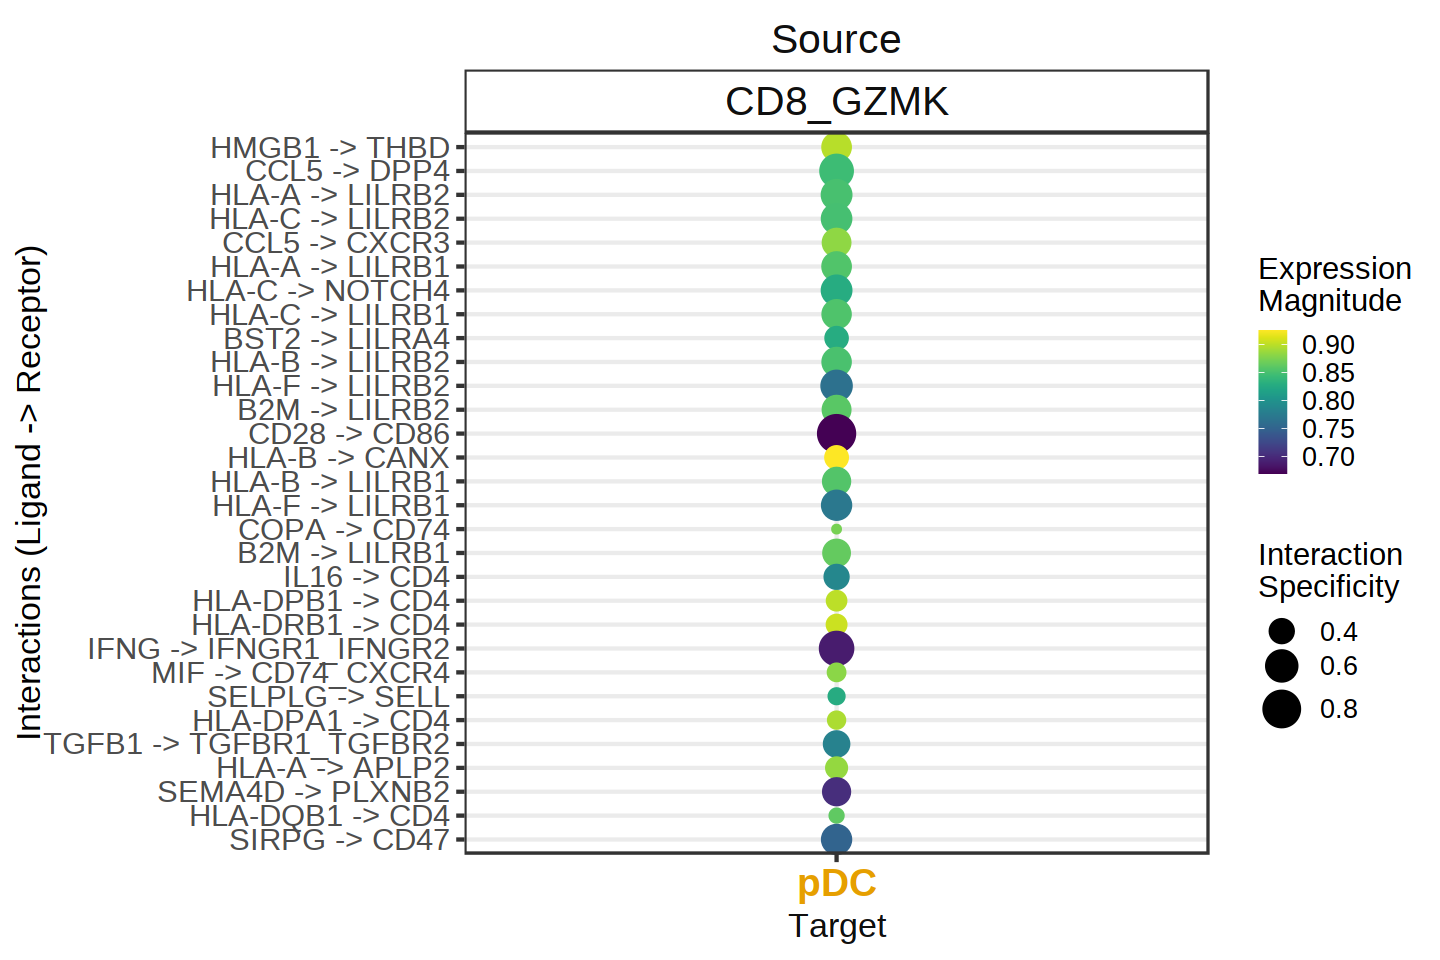

In [88]:
options(repr.plot.width=12, repr.plot.height=8)
liana_test_plot %>%
  liana_dotplot(source_groups = c("CD8_GZMK"),
                target_groups = c("pDC"),
                ntop = 30)

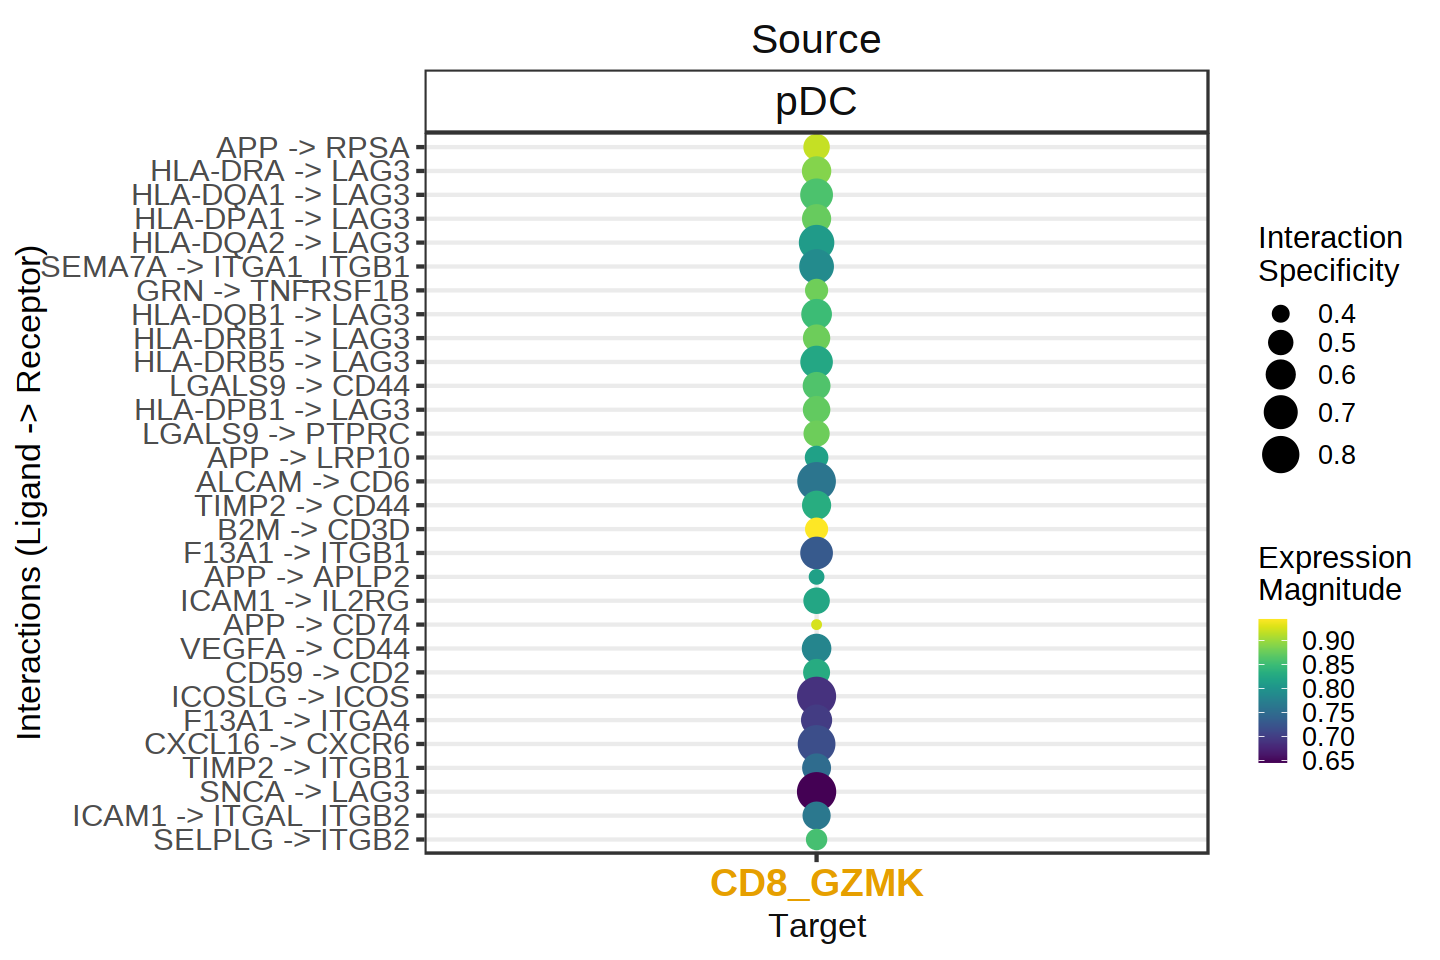

In [89]:
options(repr.plot.width=12, repr.plot.height=8)
liana_test_plot %>%
  liana_dotplot(source_groups = c("pDC"),
                target_groups = c("CD8_GZMK"),
                ntop = 30)

In [80]:
unique(data$dataset)

[1] "Our" "JIC" "NC"

In [81]:
write.csv(data@assays$RNA@counts[,which(data$dataset == 'Our')], './results//Step1_allCluster/count.csv')

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.8 GiB”


In [82]:
dim(data@assays$RNA@counts[,which(data$dataset == 'Our')])

[1] 13598 27973